In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Remove recoil e- hits from plots
Understand how pn events look in our mocked up calorimeter, how much of those events can be vetoed?


In [2]:
from __future__ import division

# This allows matplotlib plots to be shown inline
%matplotlib inline

# imports
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import root_numpy as rnp
from matplotlib.colors import LogNorm
from matplotlib.backends.backend_pdf import PdfPages
from IPython.core.display import set_matplotlib_formats

plt.style.use('bmh')
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['legend.numpoints'] = 1

#set_matplotlib_formats('pdf')

In [3]:
# Location of the ROOT ntuple
pn_file_path = '/home/omoreno/work/ldmx/analysis/4pt0_gev_e_uniform_pn/photonuclear_tuple.root'
recoil_file_path = '/home/omoreno/work/ldmx/analysis/4pt0_gev_e_uniform/recoil_tracker_tuple.root'

pn_results_rec = rnp.root2array(pn_file_path)
recoil_results_rec = rnp.root2array(recoil_file_path)

pn_target_energy = pn_results_rec['target_energy']
pn_trigger_pad_energy = pn_results_rec['trigger_pad_energy']

recoil_target_energy = recoil_results_rec['target_energy']
recoil_trigger_pad_energy = recoil_results_rec['trigger_pad_energy']

# Rejecting photo-nuclear events with an active target

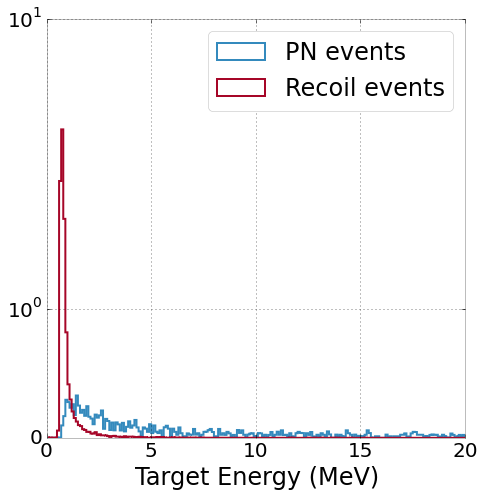

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))
            
bins = np.linspace(0, 20, 201)
ax.hist(pn_target_energy, bins=bins, histtype='step', linewidth=2, normed=True, label='PN events')
ax.hist(recoil_target_energy, bins=bins, histtype='step', linewidth=2, normed=True, label='Recoil events')
ax.set_xlabel("Target Energy (MeV)")
ax.set_yscale("symlog")
ax.legend();

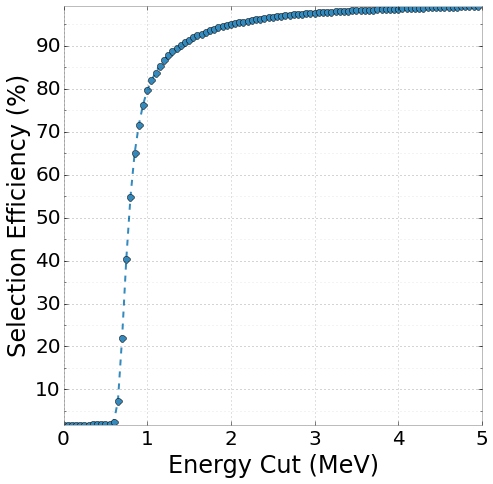

In [5]:
energy_cut = 0
selection_efficiency = []
energy_cuts = []

for index in xrange(0, 100) : 

    selection_efficiency.append((len(recoil_target_energy[recoil_target_energy <= energy_cut])/len(recoil_target_energy))*100)
    energy_cuts.append(energy_cut)
    energy_cut += 0.05
            
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))   

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)  

ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)        

ax.errorbar(energy_cuts, selection_efficiency, marker='o', markersize=7, linestyle='--')
ax.set_xlabel("Energy Cut (MeV)")
ax.set_ylabel("Selection Efficiency (%)");

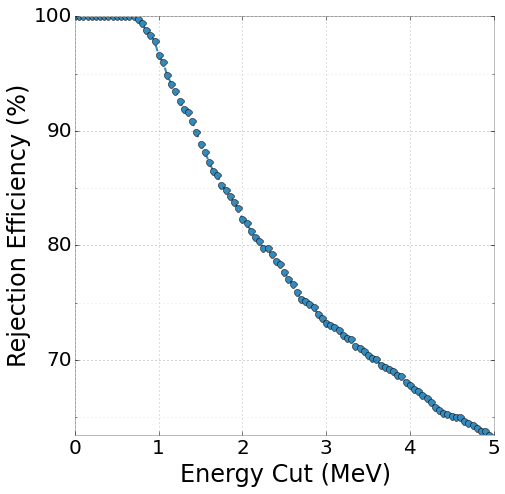

In [6]:
energy_cut = 0
rejection_efficiency = []
energy_cuts = []

for index in xrange(0, 100) : 

    rejection_efficiency.append((len(pn_target_energy[pn_target_energy > energy_cut])/len(pn_target_energy))*100)
    energy_cuts.append(energy_cut)
    energy_cut += 0.05
            
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))       

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)  

ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)        

ax.errorbar(energy_cuts, rejection_efficiency, marker='o', markersize=7, linestyle='--')
ax.set_xlabel("Energy Cut (MeV)")
ax.set_ylabel("Rejection Efficiency (%)");

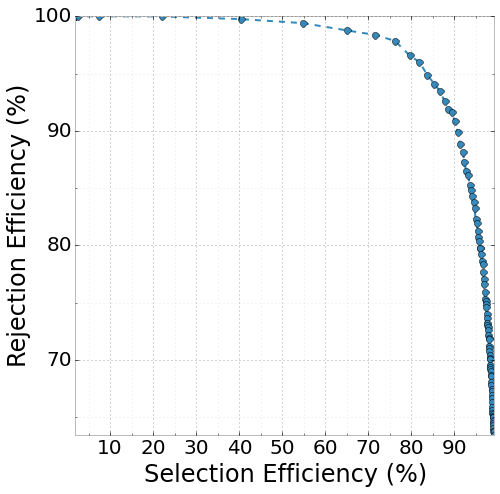

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))
                                     
major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)  

ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)                                                

ax.plot(selection_efficiency, rejection_efficiency, marker='o', markersize=7, linestyle='--')
ax.set_xlabel("Selection Efficiency (%)")
ax.set_ylabel("Rejection Efficiency (%)");

# Rejecting photo-nuclear events with the trigger pad

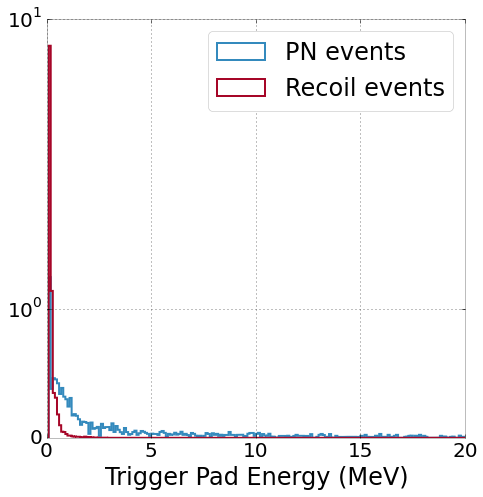

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))
            
bins = np.linspace(0, 20, 201)
ax.hist(pn_trigger_pad_energy, bins=bins, histtype='step', linewidth=2, normed=True, label='PN events')
ax.hist(recoil_trigger_pad_energy, bins=bins, histtype='step', linewidth=2, normed=True, label='Recoil events')
ax.set_xlabel("Trigger Pad Energy (MeV)")
ax.set_yscale("symlog")
ax.legend();

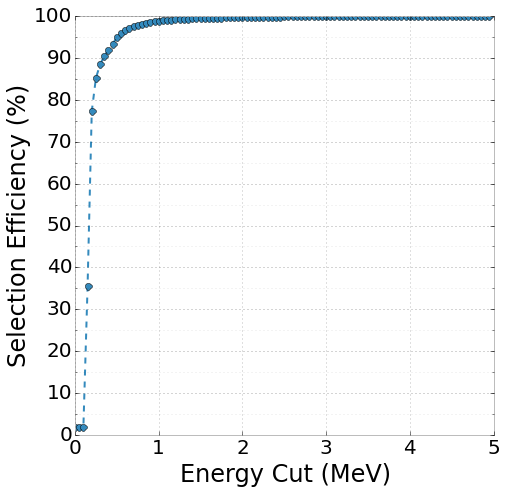

In [9]:
energy_cut = 0
selection_efficiency = []
energy_cuts = []

for index in xrange(0, 100) : 

    selection_efficiency.append((len(recoil_trigger_pad_energy[recoil_trigger_pad_energy <= energy_cut])/len(recoil_trigger_pad_energy))*100)
    energy_cuts.append(energy_cut)
    energy_cut += 0.05
            
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))            
ax.errorbar(energy_cuts, selection_efficiency, marker='o', markersize=7, linestyle='--')

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)  

ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)    

ax.set_xlabel("Energy Cut (MeV)")
ax.set_ylabel("Selection Efficiency (%)");

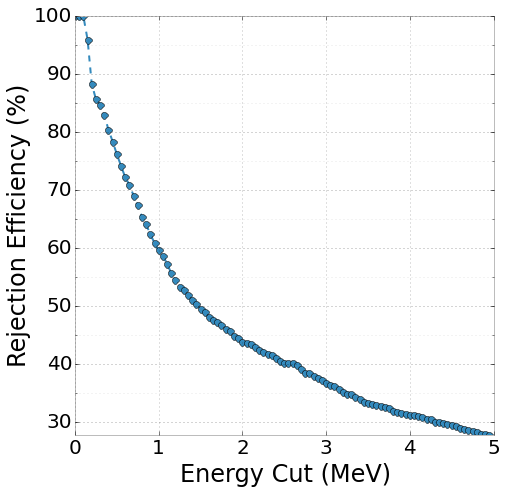

In [10]:
energy_cut = 0
rejection_efficiency = []
energy_cuts = []

for index in xrange(0, 100) : 

    rejection_efficiency.append((len(pn_trigger_pad_energy[pn_trigger_pad_energy > energy_cut])/len(pn_trigger_pad_energy))*100)
    energy_cuts.append(energy_cut)
    energy_cut += 0.05
            
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))            

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)  

ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)    

ax.errorbar(energy_cuts, rejection_efficiency, marker='o', markersize=7, linestyle='--')
ax.set_xlabel("Energy Cut (MeV)")
ax.set_ylabel("Rejection Efficiency (%)");

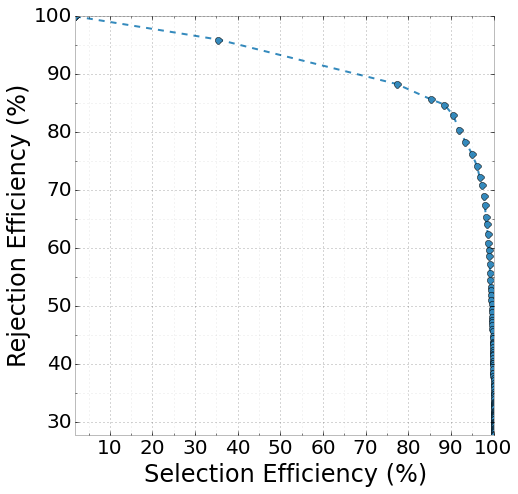

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 7.5))            

major_ticks = np.arange(0, 101, 10)                                              
minor_ticks = np.arange(0, 101, 5)  

ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  

ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5)   

ax.plot(selection_efficiency, rejection_efficiency, marker='o', markersize=7, linestyle='--')
ax.set_xlabel("Selection Efficiency (%)")
ax.set_ylabel("Rejection Efficiency (%)");